# GENDER PREDICTION BASED ON DIFFERENT ACOUSTIC PARAMETERS



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
df.shape

(3168, 21)

### CHECKING FOR NULL VALUES

In [5]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

### HANDLING THE DATA TYPES

In [6]:
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

In [7]:
df['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
lb=LabelEncoder()
df['label']=lb.fit_transform(df['label'])

In [10]:
df['label'].value_counts()

1    1584
0    1584
Name: label, dtype: int64

In [11]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [12]:
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label         int32
dtype: object

In [13]:
r1=df['label'].value_counts()
r1

1    1584
0    1584
Name: label, dtype: int64

### PIE CHART

In [112]:
r1=df['label'].value_counts()
r1

1    1584
0    1584
Name: label, dtype: int64

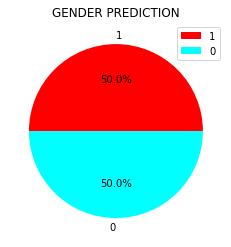

In [122]:
plt.pie(r1,labels=r1.index,autopct='%1.1f%%',colors=['red','cyan'])
plt.legend()
plt.title('GENDER PREDICTION')
plt.show()

### SELECTING THE INDEPENDENT AND DEPENDENT VARIABLES

In [15]:
x=df.drop('label',axis=1)
y=df['label']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(3168, 20)
(3168,)


### SPLITTING TRAIN AND TEST DATA

In [16]:
from sklearn.model_selection import train_test_split

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2534, 20)
(2534,)
(634, 20)
(634,)


### GENERATING MODEL

In [94]:
from sklearn.metrics import confusion_matrix,classification_report

In [95]:
def gen_model(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    print('Training Score: ',model.score(x_train,y_train))
    print('Testing Score: ',model.score(x_test,y_test))
    ypred=model.predict(x_test)
    cm=confusion_matrix(y_test,ypred)
    print('\nConfusion Matrix:\n ',cm)
    print('\nClassification Report:\n ',classification_report(y_test,ypred))

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

### LOGISTIC REGRESSION

In [97]:
m1=LogisticRegression(max_iter=1000)
gen_model(m1,x_train,x_test,y_train,y_test)

Training Score:  0.9076558800315706
Testing Score:  0.9227129337539433

Confusion Matrix:
  [[261  36]
 [ 13 324]]

Classification Report:
                precision    recall  f1-score   support

           0       0.95      0.88      0.91       297
           1       0.90      0.96      0.93       337

    accuracy                           0.92       634
   macro avg       0.93      0.92      0.92       634
weighted avg       0.92      0.92      0.92       634



### DECISION TREE

In [99]:
m3=DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_split=15)
gen_model(m3,x_train,x_test,y_train,y_test)

Training Score:  0.9901341752170482
Testing Score:  0.9621451104100947

Confusion Matrix:
  [[290   7]
 [ 17 320]]

Classification Report:
                precision    recall  f1-score   support

           0       0.94      0.98      0.96       297
           1       0.98      0.95      0.96       337

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



### RANDOM FOREST 

In [107]:
m4=RandomForestClassifier(n_estimators=70,criterion='entropy',max_depth=7,min_samples_split=15)
gen_model(m4,x_train,x_test,y_train,y_test)

Training Score:  0.9909234411996843
Testing Score:  0.9873817034700315

Confusion Matrix:
  [[294   3]
 [  5 332]]

Classification Report:
                precision    recall  f1-score   support

           0       0.98      0.99      0.99       297
           1       0.99      0.99      0.99       337

    accuracy                           0.99       634
   macro avg       0.99      0.99      0.99       634
weighted avg       0.99      0.99      0.99       634



### SVM(Support Vector Machines)

In [110]:
m5=SVC(kernel='linear',C=10)
gen_model(m5,x_train,x_test,y_train,y_test)

Training Score:  0.9711917916337806
Testing Score:  0.9842271293375394

Confusion Matrix:
  [[293   4]
 [  6 331]]

Classification Report:
                precision    recall  f1-score   support

           0       0.98      0.99      0.98       297
           1       0.99      0.98      0.99       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



# RANDOM FOREST HAS THE BEST ACCURACY SO IT IS THE BEST PERFORMING MODEL